<a href="https://colab.research.google.com/github/yepooo/Customer-churn-prediction/blob/main/Churn_predict_%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

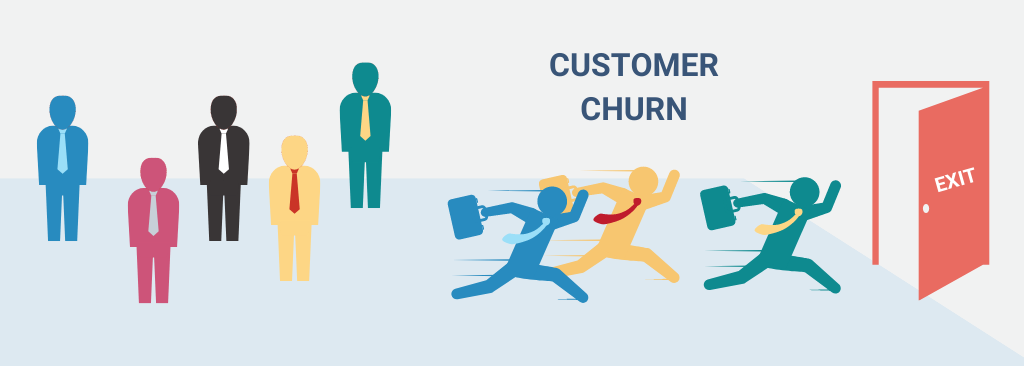

In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [319]:
#basic lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#model building lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [320]:
df=pd.read_csv('/content/drive/MyDrive/ds/Bank Customer Churn Prediction.csv')

In [321]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Target Variable-churn

In [322]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [323]:
df.shape

(10000, 12)

In [324]:
print("No of rows:",df.shape[0])
print("No of columns:",df.shape[1])

No of rows: 10000
No of columns: 12


**Data Preprocessing**

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**MISSING VALUES**

In [326]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

**Descriptive Statistics**

In [327]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [328]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

**Dropping Irrelavant Columns**

In [329]:
df=df.drop(['customer_id'],axis=1)

**Categorical Variable Encoding**

In [330]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<Axes: xlabel='country', ylabel='count'>

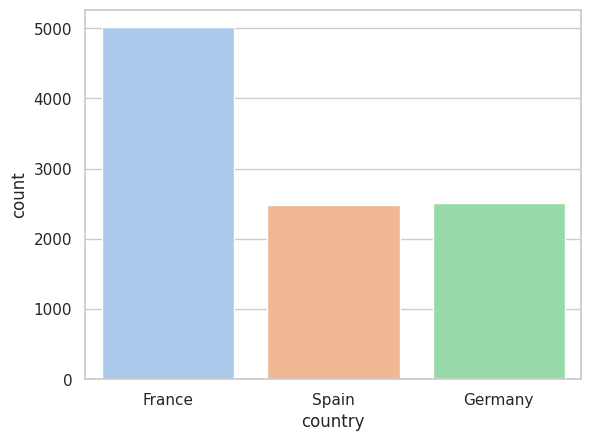

In [358]:
sns.countplot(x='country',data=df,palette='pastel')

In [249]:
df=pd.get_dummies(df,drop_first=True)

In [250]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


**EDA**

In [251]:
df["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

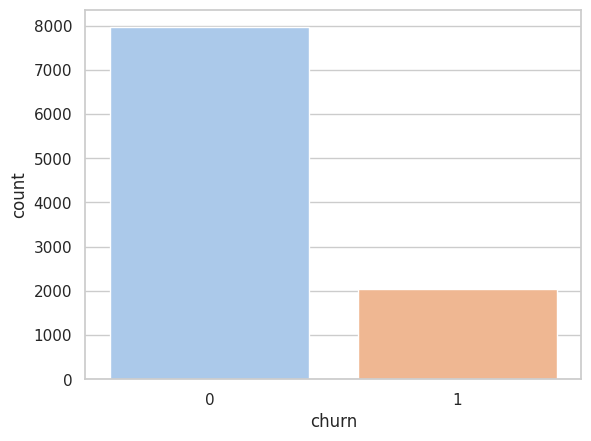

In [357]:
sns.countplot(x='churn',data=df,palette='pastel')



1.   One class (the minority class) has significantly fewer instances than another class (the majority class).


2.   This imbalance can lead to challenges and biases when developing a predictive model.




<ipython-input-362-79a8c06b05ac>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



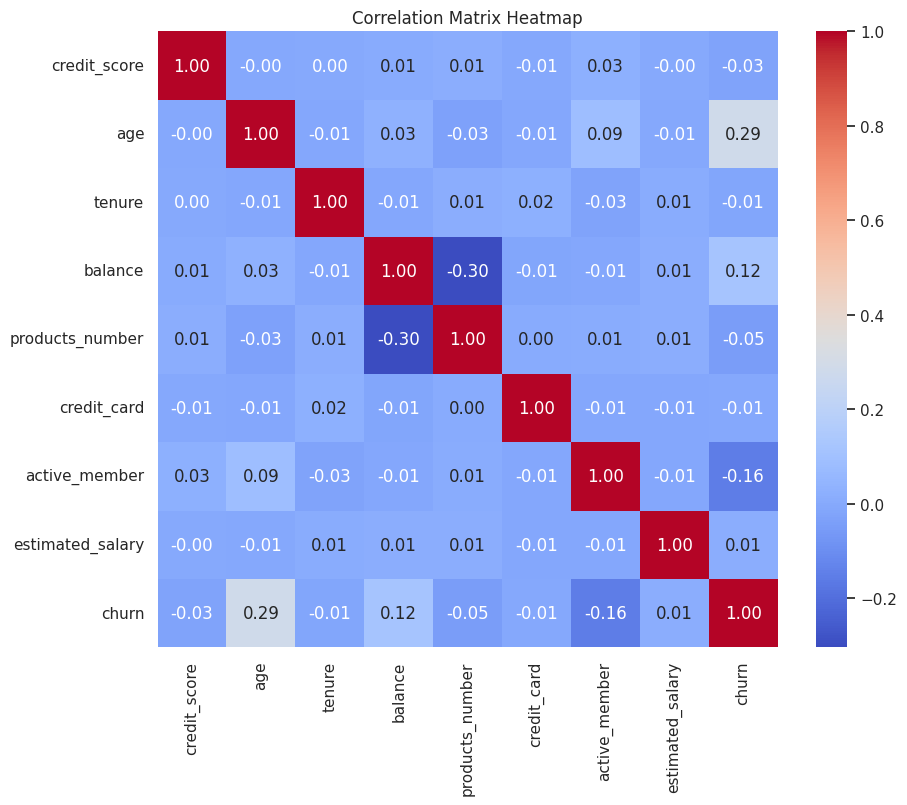

In [362]:
plt.figure(figsize=(10, 8))

# Creating the heatmap with Seaborn
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adding title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()




1.   A positive correlation between 'age' and 'churn' (0.29) indicates that older customers are more likely to churn.
2.    A positive correlation between 'balance' and 'churn' (0.12) suggests that customers with higher balances are also more likely to churn.


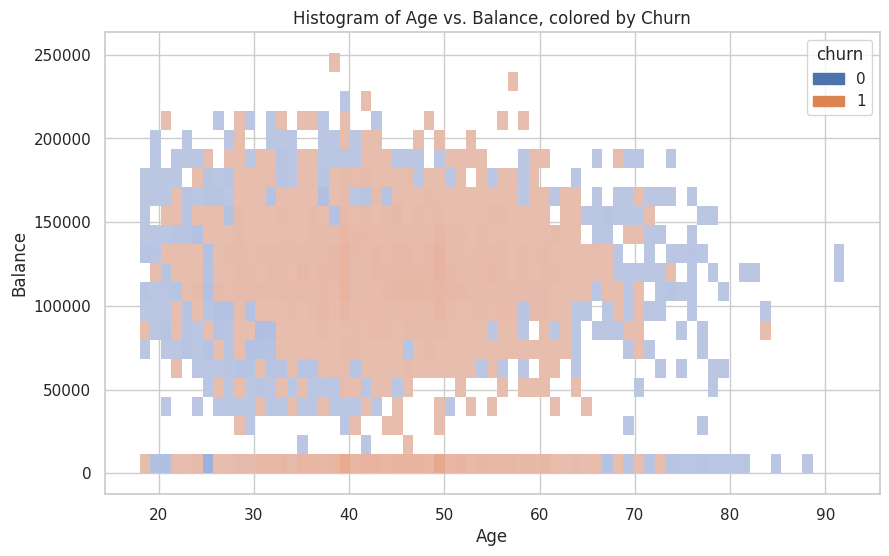

In [363]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Creating the histogram with Seaborn
sns.histplot(data=df, x='age', y='balance', hue='churn', bins='auto', kde=True)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Histogram of Age vs. Balance, colored by Churn')

# Display the plot
plt.show()


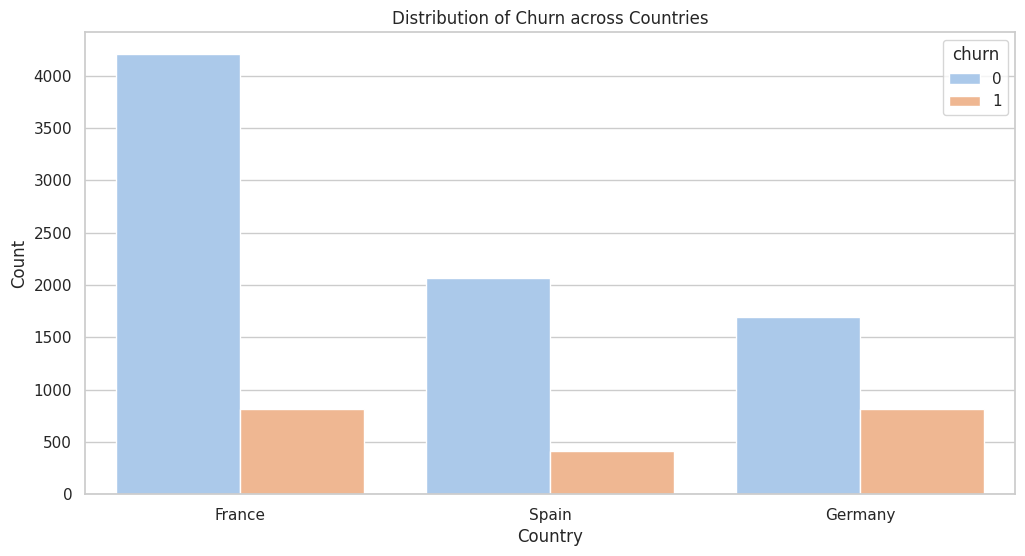

In [356]:
plt.figure(figsize=(12, 6))

# Creating the bar plot with Seaborn

sns.countplot(data=df, x='country', hue='churn', palette='pastel')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Churn across Countries')

# Display the plot
plt.show()




1.   France has the highest number of customers, the churn percentage is
relatively lower compared to the other two countries.

2.  Spain, although close to France in terms of churn percentage, has a slightly higher churn percentage than France.

3.  Germany has the highest churn percentage, indicating that customers from Germany are more likely to churn compared to customers from France or Spain.







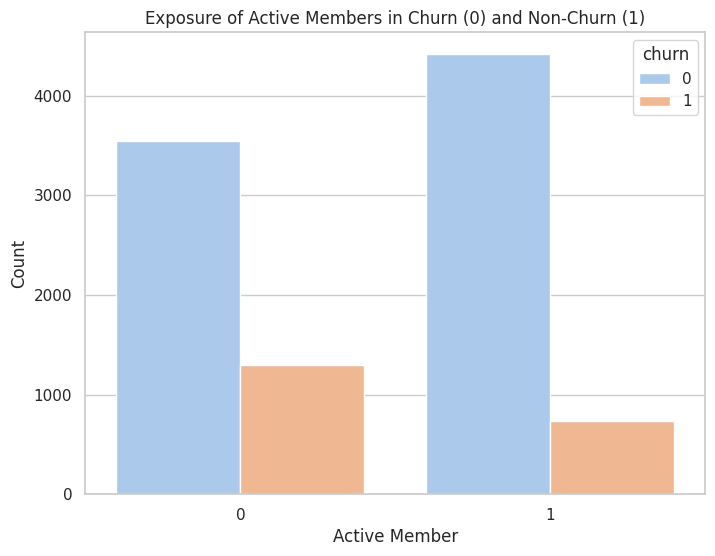

In [345]:

plt.figure(figsize=(8, 6))

# Creating the bar plot with Seaborn
sns.countplot(data=df, x='active_member', hue='churn', palette='pastel')

# Adding labels and title
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.title('Exposure of Active Members in Churn (0) and Non-Churn (1)')

# Display the plot
plt.show()




1.    Based on the histogram, it appears that even though the exposure (count of customers) is relatively similar between active_member groups 0 and 1, there is a larger churn count in the active_member = 0 group.
2. customers who are not active members (active_member = 0) are more likely to churn compared to active members (active_member = 1).





**HANDLING IMBALANCE DATA  using SMOTE**

1.   Oversampling
2.   Undersampling
3.SMOTE





In [254]:
X=df.drop('churn',axis=1)

In [305]:
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [255]:
y=df['churn']

In [256]:
from imblearn.over_sampling import SMOTE

In [257]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [258]:
y_res.value_counts()

1    7963
0    7963
Name: churn, dtype: int64





1.  Synthetic samples are created for the minority class, increasing its representation. These synthetic samples are generated by interpolating between neighboring instances of the minority class.


2.   Now that the data is balanced, we can proceed with our further steps.




**Train-Test-Split**

In [260]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

**Feature Scaling**

1.   Normalization
2.   Standardization



In [262]:
sc=StandardScaler()

In [263]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [264]:
X_train

array([[ 1.42911918,  0.20859773,  0.44555341, ..., -0.56925307,
        -0.46250555, -0.84579127],
       [ 1.09117204,  0.10793733, -1.3920479 , ..., -0.56925307,
        -0.46250555,  1.18232481],
       [-0.68577581,  0.40991851, -1.75956816, ..., -0.56925307,
        -0.46250555, -0.84579127],
       ...,
       [ 0.19724735,  0.20859773,  1.18059393, ..., -0.56925307,
        -0.46250555,  1.18232481],
       [ 0.84043707,  0.71189969, -1.02452764, ..., -0.56925307,
        -0.46250555, -0.84579127],
       [ 0.52429297,  1.01388087, -1.3920479 , ...,  1.75668794,
        -0.46250555,  1.18232481]])

**MODEL BUILDING & Evaluation**

**Logistic Regression**

In [266]:
model_log=LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [267]:
y_pred_log=model_log.predict(X_test)

In [268]:
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)

print("Accuracy:", accuracy_log)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_rep_log)

Accuracy: 0.7853107344632768
Confusion Matrix:
 [[1259  374]
 [ 310 1243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      1633
           1       0.77      0.80      0.78      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



**Support vector classifier**

In [269]:
model_svm=svm.SVC()

In [270]:
model_svm.fit(X_train,y_train)

SVC()

In [271]:
y_pred_svm=model_svm.predict(X_test)

In [272]:
accuracy_svm= accuracy_score(y_test, y_pred_svm)
conf_matrix_svm= confusion_matrix(y_test, y_pred_svm)
classification_rep_svm= classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", classification_rep_svm)

Accuracy: 0.8392969240426867
Confusion Matrix:
 [[1367  266]
 [ 246 1307]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1633
           1       0.83      0.84      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



**KNeighbour Classifier**

In [273]:
model_knn=KNeighborsClassifier()

In [274]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [275]:
y_pred_knn=model_knn.predict(X_test)

In [276]:
accuracy_knn= accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_rep_knn)

Accuracy: 0.8182674199623352
Confusion Matrix:
 [[1309  324]
 [ 255 1298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1633
           1       0.80      0.84      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



**Decision Tree Classifier**

In [277]:
model_dt=DecisionTreeClassifier()

In [278]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [279]:
y_pred_dt=model_dt.predict(X_test)



In [280]:
accuracy_dt= accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", classification_rep_dt)

Accuracy: 0.7730696798493408
Confusion Matrix:
 [[1222  411]
 [ 312 1241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1633
           1       0.75      0.80      0.77      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



**Random Forest classifier**

In [281]:
model_rf=RandomForestClassifier()

In [282]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [283]:
y_pred_rf=model_rf.predict(X_test)

In [284]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_rep_rf)


Accuracy: 0.8593848085373509
Confusion Matrix:
 [[1396  237]
 [ 211 1342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.86      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



**Gradient Boosting Classifier**

In [285]:
model_gb=GradientBoostingClassifier()

In [286]:
model_gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [287]:
y_pred_gb=model_gb.predict(X_test)

In [288]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb= classification_report(y_test, y_pred_gb)

print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", classification_rep_gb)

Accuracy: 0.8449466415568111
Confusion Matrix:
 [[1374  259]
 [ 235 1318]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1633
           1       0.84      0.85      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.85      0.84      3186
weighted avg       0.85      0.84      0.84      3186



In [289]:

final_data=pd.DataFrame({'MODELS':['model_log','model_svm','model_knn','model_dt','model_rf','model_gb'],'Accuracy':[accuracy_log,accuracy_svm,accuracy_knn,accuracy_dt,accuracy_rf,accuracy_gb]})

In [367]:
final_data

,MODELS,Accuracy
0,model_log,0.785311
1,model_svm,0.839297
2,model_knn,0.818267
3,model_dt,0.773070
4,model_rf,0.859385
5,model_gb,0.844947


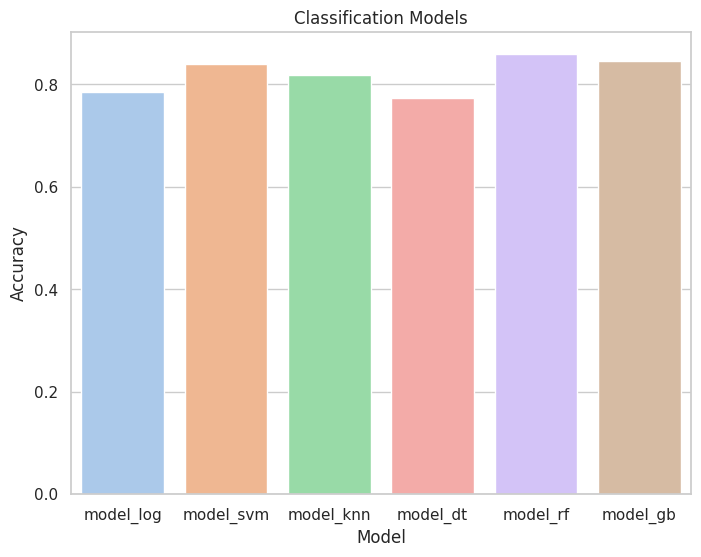

In [368]:
plt.figure(figsize=(8, 6))

# Creating the bar plot with Seaborn
sns.barplot(x=final_data['MODELS'],y=final_data['Accuracy'],palette='pastel')


# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification Models')

# Display the plot
plt.show()


1.   Based on the comparison, the Random Forest model (model_rf) seems to be the most suitable choice for customer churn prediction due to its higher accuracy and robustness.



2.   It can help identify customers at risk of churn, enabling the implementation of targeted retention strategies to improve customer loyalty and optimize business operations.


**Saving Model**

In [293]:
X_res=sc.fit_transform(X_res)

In [294]:
model_rf.fit(X_res,y_res)

RandomForestClassifier()

In [295]:
import joblib

In [296]:
joblib.dump(model_rf,'churnpredict+')

['churnpredict+']

**Trained Model Predictions**

In [297]:
model=joblib.load('churnpredict+')

In [312]:
df.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')

In [308]:
model.predict([[322,35,2,76886,0,1,1,1221234.99,1,0,1]])

array([0])

In [313]:
model.predict([[619,42,2,0.0,0,0,0,124234.99,0,0,0]])

array([1])

 The developed customer churn prediction model using the **Random Forest classifier** holds significant promise in aiding our business to reduce customer churn and enhance customer retention efforts. With an accuracy of **86%**, the model provides valuable insights that can lead to improved customer satisfaction and long-term business success.